In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt




## Loading Dataset
The dataset that we are going to use for this "Amazon" product review. The dataset consits of of total #346355 the documents contain positive and negative reviews regarding the product. further details regarding dataset can be found to be at http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care.json.gz  


In [12]:
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000)
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
df.shape

(346355, 10)

Making an additional column to decide "Positive or Nagative" review based ob the score

In [13]:
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]
df.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_class
0,0,159985130X,"[1, 1]",5.0,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,1
1,1,159985130X,"[1, 1]",4.0,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,1


## Training and Testing Sets 
Like any other supervised machine learning problems, we need to divide out data into training and testing sets, to do so we used the train_test_split utility from the sklearn.model_selection library

### Finding TFID

Mulitplying the term frequency of a word by the inverse document frequency. The TF stands for "Term frequency" while IDF stand for "Invers Document Frequency" The ft-idf value increases proportionally to the number of documents in word appears in the document.

The term frequency is calculated as:

Term frequency = (Number of Occurrences of a word)/(Total words in the document)  

And the Inverse Document Frequency is calculated as:

IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  


## Training Text Classification Model and Predicting Sentiment

We have divided our data into training and testing set. Now is the time to see real actio, we will use logisticRegression  from sklearn. The fit method of this class used to train the algorithm. we need to pass trainign and training target sets tho this method.
Finally, to predict the sentiment for the documents in our text set we can use predict()

x_train shape: (259766,)
y_train shape: (259766,)

x_test shape: (86589,)
y_test shape: (86589,)

Accuracy score: 0.8738292392798162


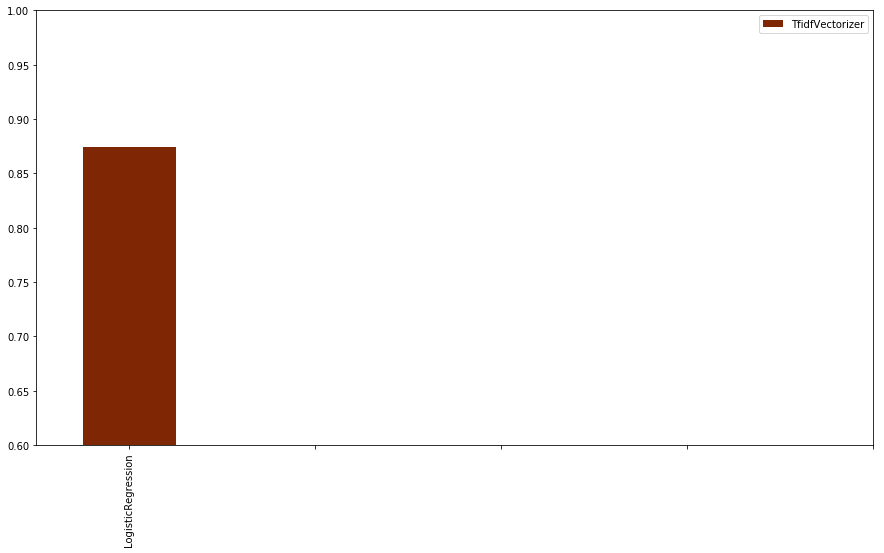

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
# Learn vocabulary and idf from training set.
x_train_tv = vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))

# training algorithm 
# model = GaussianNB()
model = LogisticRegression()
# model = svm.SVC()
# model = LinearSVC() # 0.87
# model = tree.DecisionTreeClassifier()
# model = RandomForestClassifier() # 0.82
# model = GradientBoostingClassifier() # 0.83
# Fit the model according to the given training data.
# Training vector, where n_samples is the number of samples and n_features is the number of features.
model.fit(x_train_tv,y_train)
# Predict class labels for samples in X.
y_predict = model.predict(x_test_tv)
# Accuracy classification score
cv_score = accuracy_score(y_test,y_predict)
# Plotting the graph
results = {'Model':['LogisticRegression'],
           'TfidfVectorizer':[cv_score]
         }
 
    
results_df = pd.DataFrame(results)
results_df.plot.bar(ylim=(0.60,1.0), figsize=(15,8), align='center', colormap="Oranges_r")
plt.xticks(np.arange(5), results_df.Model)

# printing the out of the score
print('Accuracy score:', cv_score) 

## Plotting the Graph

We used sklearn library to plot score graph against the algorithm


In [22]:
x_test_tv.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# read text data from file
df = pd.read_csv("test-data-filtered.csv")

In [24]:
# transformed 
test_vector = vectorizer.transform(df.reviewText.values.astype('U'))
actualPredict = model.predict(test_vector)
actualPredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])